In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_loader
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(42)

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2026-01-12 04:07:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 172.217.70.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.6MB/s    in 6.1s    

2026-01-12 04:07:09 (17.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:
with zipfile.ZipFile('pizza_steak.zip') as zip_ref:
    zip_ref.extractall()

In [5]:
os.listdir('pizza_steak')

['test', 'train']

In [6]:
os.listdir('pizza_steak/test/')

['steak', 'pizza']

In [7]:
os.listdir('pizza_steak/train/')

['steak', 'pizza']

In [8]:
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

In [9]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [10]:
train_datagen=train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),batch_size=32,class_mode='binary')
#

Found 1500 images belonging to 2 classes.


In [11]:
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='binary')

Found 500 images belonging to 2 classes.


In [21]:
#create Model and Add Layers
model=Sequential(
    [
        Input(shape=(224,224,3)),
        Conv2D(16,3,activation='relu'),
        MaxPooling2D(),
        Conv2D(32,3,activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(1,activation='sigmoid')

    ]
)


In [22]:
# Compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [23]:
# Train the model
history=model.fit(train_datagen,epochs=10,validation_data=test_data)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.5205 - loss: 0.9697 - val_accuracy: 0.8120 - val_loss: 0.4271
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7841 - loss: 0.4602 - val_accuracy: 0.8640 - val_loss: 0.3591
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.8466 - loss: 0.3708 - val_accuracy: 0.8720 - val_loss: 0.3201
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.8850 - loss: 0.2961 - val_accuracy: 0.8700 - val_loss: 0.3040
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9141 - loss: 0.2415 - val_accuracy: 0.8480 - val_loss: 0.3638
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9473 - loss: 0.1666 - val_accuracy: 0.8660 - val_loss: 0.3179
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9649 - loss: 0.1281 - val_accuracy: 0.8180 - val_loss: 0.3782
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9722 - loss: 0.0960 - val_accuracy: 0

In [24]:
# Evaluate the Model
loss,accuracy=model.evaluate(test_data)
print("Loss:",loss)
print("Accuracy:",accuracy)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8631 - loss: 0.3951
Loss: 0.37868160009384155
Accuracy: 0.8539999723434448


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


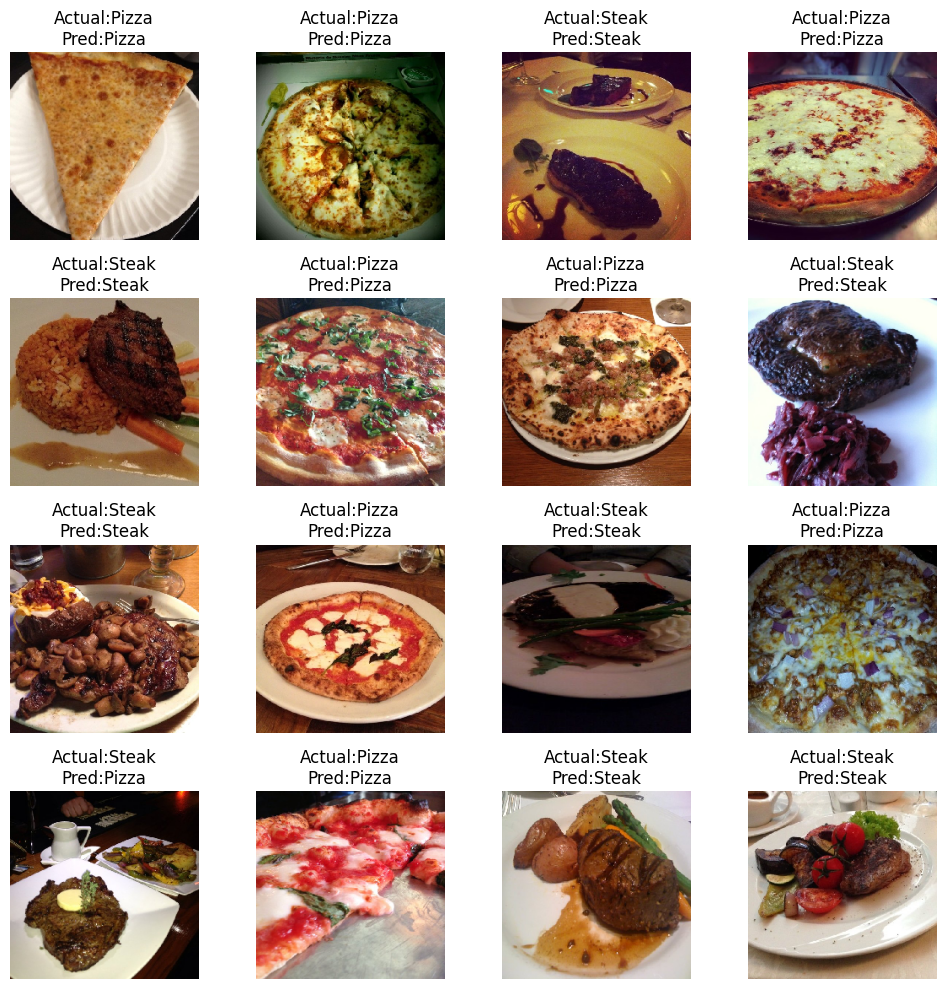

In [25]:
# Prediction
images,lables=next(test_data)
predictions=model.predict(images)
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.axis('off')
    true_label='Pizza' if lables[i]==0 else 'Steak'
    pred_label='Pizza' if predictions[i]<0.5 else 'Steak'
    plt.title(f'Actual:{true_label}\nPred:{pred_label}')
plt.tight_layout()
plt.show()




Saving pizza.jpg to pizza.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
Prediction:Pizza


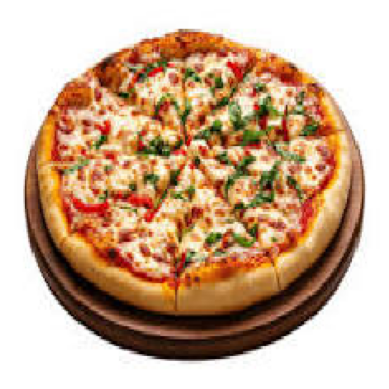

In [26]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
    image_path='/content/'+fn
    img=image_loader.load_img(image_path,target_size=(224,224))
    img_array=image_loader.img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array/=255.0
    predictions=model.predict(img_array)[0][0]
    label='Pizza' if predictions<0.5 else 'Steak'
    print(f'Prediction:{label}')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

